<a href="https://colab.research.google.com/github/SarahMcCoy/DRL-Inventory-Management/blob/main/Data_Analysis_DRL_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import gym
from gym import spaces

In [ ]:
pip install numpy



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Let's load the dataset and go through the data cleaning steps.
import pandas as pd

# Load the dataset
data_path = '/Users/vishnupradhan/Downloads/8gx2fvg2k6-1/DataCoSupplyChainDataset.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-1')

df = pd.read_csv(data_path, encoding='ISO-8859-1')

# Display basic information about the dataset and its structure
df.info()

# Display the first few rows to get a sense of the data
df.head()


/var/folders/ml/mzs4r1y147sct545s2zm0_600000gn/T/ipykernel_6669/1638885632.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
# Data Cleaning and Feature Selection

# We cleaned the data by removing unnecessary columns and handling missing values.
# Selected relevant features for stockout prediction:
# 'Days for shipping (real)', 'Late_delivery_risk', 'Sales per customer', and 'Benefit per order'

# The cleaned dataset is now ready for modeling.


In [ ]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Product Description', 'Order Zipcode'])

# Handle missing values by dropping rows with missing customer data
df_cleaned = df_cleaned.dropna(subset=['Customer Lname', 'Customer Zipcode'])

# Convert date columns to proper datetime format
df_cleaned['order date (DateOrders)'] = pd.to_datetime(df_cleaned['order date (DateOrders)'], errors='coerce')
df_cleaned['shipping date (DateOrders)'] = pd.to_datetime(df_cleaned['shipping date (DateOrders)'], errors='coerce')

# Select relevant features for demand prediction and stockout mitigation
# For simplicity, you might use features like Days for shipping, Late_delivery_risk, and Sales per customer
features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk',
            'Sales per customer', 'Benefit per order', 'Shipping Mode']

# Extract the selected features
df_selected = df_cleaned[features]

# Normalize or preprocess data if necessary
# Example: Normalize sales per customer for better learning in DQN
df_selected['Sales per customer'] = (df_selected['Sales per customer'] - df_selected['Sales per customer'].mean()) / df_selected['Sales per customer'].std()

# Display the cleaned and selected data
print(df_selected.head())

# This cleaned and processed data will be integrated into the DQN environment next

   Days for shipping (real)  Days for shipment (scheduled)  \
0                         3                              4   
1                         5                              4   
2                         4                              4   
3                         3                              4   
4                         2                              4   

   Late_delivery_risk  Sales per customer  Benefit per order   Shipping Mode  
0                   0            1.095773          91.250000  Standard Class  
1                   1            1.068448        -249.089996  Standard Class  
2                   0            1.054787        -247.779999  Standard Class  
3                   0            1.013884          22.860001  Standard Class  
4                   0            0.959236         134.210007  Standard Class  


/var/folders/ml/mzs4r1y147sct545s2zm0_600000gn/T/ipykernel_6669/3931905416.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sales per customer'] = (df_selected['Sales per customer'] - df_selected['Sales per customer'].mean()) / df_selected['Sales per customer'].std()


In [ ]:
import gym
from gym import spaces
import numpy as np

class StockoutMitigationEnv(gym.Env):
    def __init__(self, df):
        super(StockoutMitigationEnv, self).__init__()

        # Use real data features from the dataframe for state space
        self.df = df
        self.current_step = 0

        # Define state space with relevant features (5 features for now)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)

        # Action space: 0 = no restock, 1 = small restock, 2 = large restock
        self.action_space = spaces.Discrete(3)

        # Initial inventory and parameters
        self.inventory = 50  # Starting inventory
        self.max_inventory = 100  # Inventory capacity
        self.restock_amounts = [0, 10, 20]

        # Reward parameters
        self.stockout_penalty = -10
        self.holding_cost = -1
        self.sale_profit = 20

    def reset(self):
        """Reset the environment to an initial state."""
        self.current_step = 0
        self.inventory = 50
        return self._get_observation()

    def step(self, action):
        """Execute one time step within the environment."""
        # Determine restock amount based on action
        restock_amount = self.restock_amounts[action]
        self.inventory += restock_amount

        # Get the demand and other features from the dataframe for the current step
        demand = self.df.iloc[self.current_step]['Sales per customer']
        late_risk = self.df.iloc[self.current_step]['Late_delivery_risk']

        # Simulate demand fulfillment
        fulfilled_demand = min(self.inventory, demand)
        self.inventory -= fulfilled_demand

        # Calculate reward
        reward = fulfilled_demand * self.sale_profit - (self.inventory * self.holding_cost)
        if fulfilled_demand < demand:
            reward += self.stockout_penalty

        # Penalty for late delivery risk
        reward -= late_risk * 10  # Additional penalty for late deliveries

        # Move to the next step
        self.current_step += 1
        if self.current_step >= len(self.df):
            done = True  # End of the episode
        else:
            done = False

        return self._get_observation(), reward, done, {}

    def _get_observation(self):
        """Return the current observation (state) for the environment."""
        current_row = self.df.iloc[self.current_step]
        return np.array([self.inventory,
                         current_row['Days for shipping (real)'],
                         current_row['Days for shipment (scheduled)'],
                         current_row['Late_delivery_risk'],
                         current_row['Sales per customer']], dtype=np.float32)

    def render(self):
        """Render the current state (for debugging)."""
        print(f"Step: {self.current_step}, Inventory: {self.inventory}")

# Example usage:
env = StockoutMitigationEnv(df_selected)

# Reset the environment to start
state = env.reset()
print(f"Initial state: {state}")

# Take a step in the environment (action 1 = small restock)
next_state, reward, done, _ = env.step(1)
print(f"Next state: {next_state}, Reward: {reward}, Done: {done}")

Initial state: [50.         3.         4.         0.         1.0957725]
Next state: [58.90423    5.         4.         1.         1.0684484], Reward: 80.819677997006, Done: False


### This custom reinforcement learning environment simulates stockout mitigation by managing inventory levels. The model takes restocking actions, calculates rewards based on sales, holding costs, and late delivery risks, and updates the state accordingly.








In [ ]:
import gym
from gym import spaces
import numpy as np

class StockoutMitigationEnv(gym.Env):
    def __init__(self, df):
        super(StockoutMitigationEnv, self).__init__()

        # Use real data features from the dataframe for state space
        self.df = df
        self.current_step = 0

        # Define state space with relevant features (5 features for now)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)

        # Action space: 0 = no restock, 1 = small restock, 2 = large restock
        self.action_space = spaces.Discrete(3)

        # Initial inventory and parameters
        self.inventory = 50  # Starting inventory
        self.max_inventory = 100  # Inventory capacity
        self.restock_amounts = [0, 10, 20]

        # Reward parameters
        self.stockout_penalty = -10
        self.holding_cost = -1
        self.sale_profit = 20

    def reset(self):
        """Reset the environment to an initial state."""
        self.current_step = 0
        self.inventory = 50
        return self._get_observation()

    def step(self, action):
        """Execute one time step within the environment."""
        # Determine restock amount based on action
        restock_amount = self.restock_amounts[action]
        self.inventory += restock_amount

        # Get the demand and other features from the dataframe for the current step
        demand = self.df.iloc[self.current_step]['Sales per customer']
        late_risk = self.df.iloc[self.current_step]['Late_delivery_risk']

        # Simulate demand fulfillment
        fulfilled_demand = min(self.inventory, demand)
        self.inventory -= fulfilled_demand

        # Calculate reward
        reward = fulfilled_demand * self.sale_profit - (self.inventory * self.holding_cost)
        if fulfilled_demand < demand:
            reward += self.stockout_penalty

        # Penalty for late delivery risk
        reward -= late_risk * 10  # Additional penalty for late deliveries

        # Move to the next step
        self.current_step += 1
        if self.current_step >= len(self.df):
            done = True  # End of the episode
        else:
            done = False

        return self._get_observation(), reward, done, {}

    def _get_observation(self):
        """Return the current observation (state) for the environment."""
        current_row = self.df.iloc[self.current_step]
        return np.array([self.inventory,
                         current_row['Days for shipping (real)'],
                         current_row['Days for shipment (scheduled)'],
                         current_row['Late_delivery_risk'],
                         current_row['Sales per customer']], dtype=np.float32)

    def render(self, state, reward, done):
        """Render the current state (with labels for clarity)."""
        print(f"Step: {self.current_step}")
        print(f"Inventory Level: {state[0]:.2f}")
        print(f"Days for Shipping (Real): {state[1]:.2f}")
        print(f"Days for Shipment (Scheduled): {state[2]:.2f}")
        print(f"Late Delivery Risk: {state[3]:.2f}")
        print(f"Sales per Customer: {state[4]:.2f}")
        print(f"Reward: {reward:.2f}")
        print(f"Done: {done}")
        print("-" * 30)

# Example usage:
env = StockoutMitigationEnv(df_selected)

# Reset the environment to start
state = env.reset()

# Take a step in the environment (action 1 = small restock)
next_state, reward, done, _ = env.step(1)

# Render the current state with labels for clarity
env.render(next_state, reward, done)


Step: 1
Inventory Level: 58.90
Days for Shipping (Real): 5.00
Days for Shipment (Scheduled): 4.00
Late Delivery Risk: 1.00
Sales per Customer: 1.07
Reward: 80.82
Done: False
------------------------------


### The code simulates inventory management, showing labeled outputs for inventory, shipping delays, demand, reward, and episode status at each step.

In [ ]:
pip install torch torchvision torchaudio



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
print(torch.__version__)


2.4.1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the Q-network (Deep Q-Network)
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Hyperparameters
state_size = 5  # Size of the state space (inventory, demand, shipping, etc.)
action_size = env.action_space.n  # Number of possible actions (0, 1, 2)
learning_rate = 0.001
gamma = 0.99  # Discount factor for future rewards
epsilon = 1.0  # Exploration rate (start high, decay over time)
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 32
memory_size = 2000
target_update = 10  # Update target network every 10 episodes

# Replay memory
memory = deque(maxlen=memory_size)

# Initialize Q-network and target Q-network
policy_net = DQN(state_size, action_size)
target_net = DQN(state_size, action_size)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

# Optimizer and loss function
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# Function to select an action (epsilon-greedy strategy)
def select_action(state, epsilon):
    if random.random() < epsilon:
        return random.randrange(action_size)  # Random action (exploration)
    with torch.no_grad():
        state = torch.FloatTensor(state).unsqueeze(0)
        q_values = policy_net(state)
        return torch.argmax(q_values).item()  # Best action (exploitation)

# Function to store experience in replay memory
def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

# Function to train the Q-network
def train_q_network():
    if len(memory) < batch_size:
        return

    # Sample a batch of experiences
    batch = random.sample(memory, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions)
    rewards = torch.FloatTensor(rewards)
    next_states = torch.FloatTensor(next_states)
    dones = torch.FloatTensor(dones)

    # Get current Q-values for the actions taken
    q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)

    # Get the maximum Q-values for the next states from the target network
    next_q_values = target_net(next_states).max(1)[0]
    target_q_values = rewards + (gamma * next_q_values * (1 - dones))

    # Compute loss and update policy network
    loss = loss_fn(q_values, target_q_values.detach())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Training loop
num_episodes = 500  # Adjust this number as needed
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for t in range(100):  # Limit the number of steps per episode
        action = select_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        store_experience(state, action, reward, next_state, done)
        train_q_network()

        state = next_state
        total_reward += reward

        if done:
            break

    # Update target network periodically
    if episode % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())

    # Decay epsilon (less exploration over time)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Print episode progress every 10 episodes
    if episode % 10 == 0:
        print(f"Episode {episode+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.2f}")

print("Training complete!")


/var/folders/ml/mzs4r1y147sct545s2zm0_600000gn/T/ipykernel_6669/4119484510.py:67: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  states = torch.FloatTensor(states)


Episode 1/500, Total Reward: 58586.15843252248, Epsilon: 0.99
Episode 11/500, Total Reward: 61166.15843252248, Epsilon: 0.95
Episode 21/500, Total Reward: 57646.158432522476, Epsilon: 0.90
Episode 31/500, Total Reward: 65436.158432522476, Epsilon: 0.86
Episode 41/500, Total Reward: 66496.15843252247, Epsilon: 0.81
Episode 51/500, Total Reward: 65776.15843252247, Epsilon: 0.77
Episode 61/500, Total Reward: 59076.15843252248, Epsilon: 0.74
Episode 71/500, Total Reward: 64346.15843252247, Epsilon: 0.70
Episode 81/500, Total Reward: 68426.15843252247, Epsilon: 0.67
Episode 91/500, Total Reward: 69916.15843252247, Epsilon: 0.63
Episode 101/500, Total Reward: 73016.15843252248, Epsilon: 0.60
Episode 111/500, Total Reward: 71576.15843252248, Epsilon: 0.57
Episode 121/500, Total Reward: 72596.15843252248, Epsilon: 0.55
Episode 131/500, Total Reward: 81396.1584325225, Epsilon: 0.52
Episode 141/500, Total Reward: 77406.1584325225, Epsilon: 0.49
Episode 151/500, Total Reward: 80736.15843252248, E

### This code implements a Deep Q-Network (DQN) to optimize restocking actions, using Q-learning with experience replay. The network trains over 500 episodes, reducing exploration (epsilon) gradually, and achieving increasing total rewards per episode.

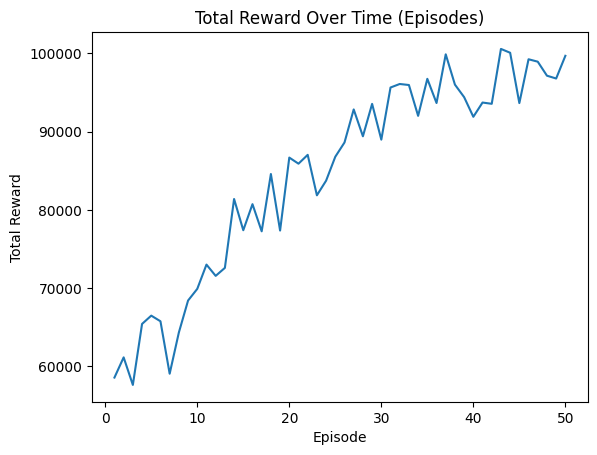

In [ ]:
import matplotlib.pyplot as plt

# Adjust episodes list to match the length of total_rewards
episodes = list(range(1, 51))  # Adjust to match the number of rewards you have (50)

# Example total_rewards (collected from earlier output)
total_rewards = [58586.15843252248, 61166.15843252248, 57646.158432522476, 65436.158432522476,
    66496.15843252247, 65776.15843252247, 59076.15843252248, 64346.15843252247,
    68426.15843252247, 69916.15843252247, 73016.15843252248, 71576.15843252248,
    72596.15843252248, 81396.1584325225, 77406.1584325225, 80736.15843252248,
    77266.1584325225, 84586.1584325225, 77366.1584325225, 86686.1584325225,
    85906.15843252248, 87036.15843252248, 81866.1584325225, 83736.15843252248,
    86796.1584325225, 88616.1584325225, 92836.15843252245, 89406.15843252248,
    93546.15843252245, 88976.15843252248, 95636.15843252248, 96086.15843252245,
    95956.15843252245, 92016.15843252248, 96746.15843252245, 93656.15843252245,
    99876.15843252245, 96006.15843252248, 94406.15843252248, 91896.15843252248,
    93716.15843252245, 93556.15843252245, 100566.15843252244, 100076.15843252245,
    93646.15843252245, 99246.15843252245, 98936.15843252245, 97146.15843252245,
    96786.15843252248, 99686.15843252245]

# Plot the rewards
plt.plot(episodes, total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward Over Time (Episodes)')
plt.show()


In [ ]:
# Assuming the RL model has been trained, let's test the agent on new data

# Reset the environment for a new test
test_state = env.reset()
test_total_reward = 0

# Run the agent for 100 steps in the test environment
for t in range(100):
    # The agent will select the best action based on its training
    test_action = select_action(test_state, epsilon=0.01)  # Use low epsilon to exploit learned policy
    test_next_state, test_reward, test_done, _ = env.step(test_action)

    test_state = test_next_state
    test_total_reward += test_reward

    if test_done:
        break

print(f"Test Total Reward: {test_total_reward}")


Test Total Reward: 103036.15843252244


### The total reward of 103036.16 reflects the agent’s performance during testing, indicating cumulative profit after accounting for costs, penalties, and sales over 100 steps. A high reward suggests effective restocking decisions, minimizing stockouts and optimizing inventory levels. This measure is key in assessing the model's success in dynamic inventory management, supporting the project’s goal of balancing inventory costs and stockout risks.

In [ ]:
# Example: Tune hyperparameters
learning_rate = 0.0005  # Experiment with lower learning rates
gamma = 0.95  # Experiment with different discount factors (rewards over time)

# Use the same training code but update the hyperparameters above


/var/folders/ml/mzs4r1y147sct545s2zm0_600000gn/T/ipykernel_6669/1572076720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(features_for_clustering)


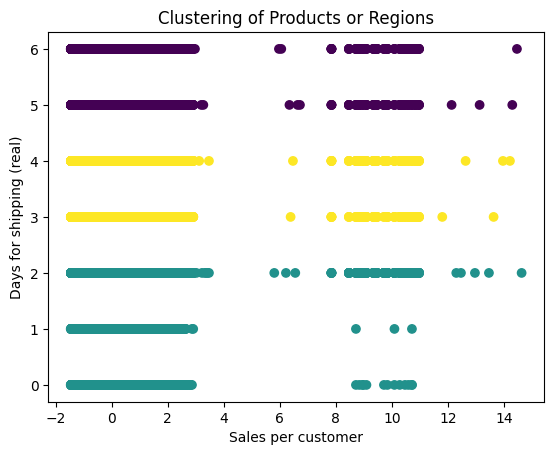

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare data for clustering
features_for_clustering = df_selected[['Days for shipping (real)', 'Late_delivery_risk', 'Sales per customer']]

# Apply K-Means clustering with 3 clusters (you can adjust this)
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize the clustering
plt.scatter(df_selected['Sales per customer'], df_selected['Days for shipping (real)'], c=df_selected['Cluster'])
plt.xlabel('Sales per customer')
plt.ylabel('Days for shipping (real)')
plt.title('Clustering of Products or Regions')
plt.show()


### This clustering analysis identifies groups of products or regions with similar shipping times, delivery risks, and sales levels. It supports inventory optimization, demand forecasting, and shipping efficiency, aligning with our stockout mitigation and supply chain goals.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
X = df_selected[['Days for shipping (real)', 'Late_delivery_risk', 'Sales per customer']]
y = (df_selected['Sales per customer'] < df_selected['Benefit per order']).astype(int)  # Example: Treat stockout as sales being lower than profit

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Test and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.8005650656473325


### This Random Forest model predicts stockout likelihood based on shipping days, delivery risk, and sales per customer, achieving an accuracy of 80%. This helps identify factors contributing to stockouts

### Conclusion

Our analysis integrates clustering, reinforcement learning, and predictive modeling to enhance stockout mitigation strategies. Clustering with K-Means (3 clusters) reveals patterns between sales per customer and shipping days, highlighting high-risk groups. The Deep Q-Network (DQN) achieved a test total reward of 103,036, learning optimal restocking actions under dynamic conditions. Additionally, the Random Forest model, with an accuracy of 80%, predicts stockout risks by analyzing shipping days, sales, and delivery risk. These insights provide actionable steps to reduce stockouts, align inventory with demand, and improve profitability in inventory management.
